# Project №5 Lab Journal
## H+, or how to build a perfect human

### **1) Downloading the data**



“Fix your teacher” data (23andMe) was downloaded from [Google Drive](https://drive.google.com/file/d/1QJkwJe5Xl_jSVpqdTSNXP7sqlYfI666j/view) and renamed to '23_and_me_input.txt'

In [1]:
! mv SNP_raw_v4_Full_20170514175358.txt 23_and_me_input.txt

### **2) File conversion**

For analysis we will need to convert 23andMe's raw data into standard vcf format. We will use [plink](https://www.cog-genomics.org/plink/), a program widely used in population genetics.

First, remove all SNPs corresponding to deletions and insertions to make the file compatible with annotation tools.

In [2]:
! plink --23file 23_and_me_input.txt --recode vcf --out snps_clean \
--output-chr MT --snps-only just-acgt

PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to snps_clean.log.
Options in effect:
  --23file 23_and_me_input.txt
  --out snps_clean
  --output-chr MT
  --recode vcf
  --snps-only just-acgt

8192 MB RAM detected; reserving 4096 MB for main workspace.
--23file: snps_clean-temporary.bed + snps_clean-temporary.bim +
snps_clean-temporary.fam written.
15125 variants with indel calls present.  '--snps-only no-DI' or
--list-23-indels may be useful here.
Inferred sex: male.
595401 out of 610526 variants loaded from .bim file.
1 person (1 male, 0 females) loaded from .fam.
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1 founder and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565758596061626364656667686970717273747576777879808182838485

The resulting file contains all the analyzed SNPs, and we are interested only in variable positions.

### **3) Origins, haplogroups**

#### **Maternal (mtDNA) haplogroup**

**Tool used:** [mthap](https://dna.jameslick.com/mthap/mthap.cgi) <br/>
**Result:** H(T152C)
- Defining Markers for haplogroup H(T152C):
- HVR2: 152C 263G
- CR: 750G 1438G 4769G 8860G 15326G
- HVR1:
- Marker path from rCRS to haplogroup H(T152C): <br/>
H2a2a1(rCRS) ⇨ 263G ⇨ H2a2a ⇨ 8860G 15326G ⇨ H2a2 ⇨ 750G ⇨ H2a ⇨ 4769G ⇨ H2 ⇨ 1438G ⇨ H ⇨ 152C ⇨ H(T152C)

#### **Paternal (Y chromosome) haplogroups**

**Tool used:** [Y-SNP Subclade Predictor](https://ytree.morleydna.com/extractFromAutosomal) <br/>
**Result:** R1a1a - R1a-L168 (R1a-M17, R1a-M198)

Your data has:
- **63** Y-DNA position(s) lacking mutations recognised by the genetic genealogy community. These Y-DNA positions may not be very useful.
- **166** recognised mutation(s) with positive calls.
- **733** recognised mutation(s) with negative calls.
- **1086** recognised mutation(s) with no-calls.

YSEQ Clade Finder
**Tool used:** [YSEQ Clade Finder](https://cladefinder.yseq.net) <br/>
**Result:**
- Most specific position on the YFull YTree is [R-M417](https://www.yfull.com/tree/R-M417/) (PAGE7/PAGES00007+)
- Next best prediction (scored 66 compared to 67) R-M198

### **4) Annotation - sex and eye colour**

#### **Sex**

Based on the fact that the Y chromosome is found in the genetic material, we will hypothesise that the sex of the person whose data we are analysing is male.

#### **Eye color**

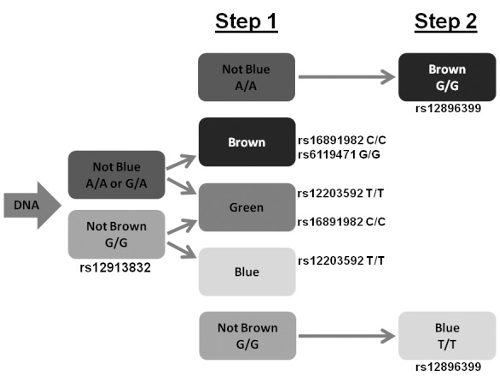<br/>
[Hart KL, Kimura SL, Mushailov V, Budimlija ZM, Prinz M, Wurmbach E. Improved eye- and skin-color prediction based on 8 SNPs. Croat Med J. 2013;54(3):248-256. doi:10.3325/cmj.2013.54.248](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3694299/#!po=39.4737)

Step 1. Not Blue or Not Brown?

In [3]:
! grep rs12913832 23_and_me_input.txt 

rs12913832	15	28365618	AG


The answer is - Not Blue

Step 2. Brown or Green?

In [4]:
! grep rs16891982 23_and_me_input.txt

rs16891982	5	33951693	CG


Cannot predict eye color on Step 2, due to heterozygosity

Step 3. Let's check other SNPs

In [5]:
! grep rs12896399 23_and_me_input.txt
! grep rs12203592 23_and_me_input.txt
! grep rs6119471 23_and_me_input.txt

rs12896399	14	92773663	GG
rs12203592	6	396321	CT


The answer is - Brown<br/>
Brown eye color is predicted by G/G at rs12896399

### **5) Annotation of all SNPs, selection of clinically relevant ones**

#### **Annotation using SnpEff/SnpSift**

In [ ]:
! snpEff GRCh37.75 snps_clean.vcf  > snps_snpeff.vcf
# it runs 37 minutes on MacBook Air M1

For each SNP we get a field ANN, which says what this SNP does (where it is located, whether the amino acid changes, and how it affects the protein)

But this is not very interesting, we are more interested in the connection with the phenotype.<br/>
First we download vcf with ClinVar variants:

In [6]:
! wget https://ftp.ncbi.nlm.nih.gov/pub/clinvar/vcf_GRCh37/clinvar.vcf.gz

--2024-02-15 12:48:06--  https://ftp.ncbi.nlm.nih.gov/pub/clinvar/vcf_GRCh37/clinvar.vcf.gz
Resolving ftp.ncbi.nlm.nih.gov (ftp.ncbi.nlm.nih.gov)... 130.14.250.13, 130.14.250.12
Connecting to ftp.ncbi.nlm.nih.gov (ftp.ncbi.nlm.nih.gov)|130.14.250.13|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 91554856 (87M) [application/x-gzip]
Saving to: ‘clinvar.vcf.gz’

clinvar.vcf.gz      100%[===================>]  87,31M  5,48MB/s    in 20s     

2024-02-15 12:48:27 (4,34 MB/s) - ‘clinvar.vcf.gz’ saved [91554856/91554856]



In [7]:
! gunzip clinvar.vcf.gz

Then we will compare our data with the ClinVar database

In [8]:
! SnpSift annotate clinvar.vcf  snps_clean.vcf > snps_clean_snpsift_clinvar.vcf 

Finally we retrieve ClinVar SNPs with a risk factors

In [9]:
! cat snps_clean_snpsift_clinvar.vcf | grep CLNDN > clinvar_snps.txt
! cat clinvar_snps.txt | grep risk > clinvar_snps_risk.txt
! cat clinvar_snps_risk.txt | wc -l

      14


At last we check ClinVar SNPs using dbSNP and SNPedia